# Part 4: Final Model Creation and Practical Application
In this workbook, I will focus of tuning the final details of the log reg model that achieved an accuracy score of 65% in the previous workbook. Then I will demonstrate the real world relevance of this model based on its performance on the 2022 season compared to sportsbook odds

In [5]:
#Importing Necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Ignore futurewarnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
final_df = pd.read_csv('final_df.csv')
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        11398 non-null  int64  
 1   week                        11398 non-null  int64  
 2   home_abbr                   11398 non-null  object 
 3   away_abbr                   11398 non-null  object 
 4   home_win                    11398 non-null  int64  
 5   interceptions_thrown        11398 non-null  float64
 6   avg_pass_completion_rate    11398 non-null  float64
 7   avg_pass_touchdowns         11398 non-null  float64
 8   avg_pass_yards_per_attempt  11398 non-null  float64
 9   avg_points_allowed          11398 non-null  float64
 10  avg_points_scored           11398 non-null  float64
 11  avg_punts                   11398 non-null  float64
 12  win_ratio                   11398 non-null  float64
 13  avg_rush_touchdowns         113

In [7]:
x = final_df.drop(['home_win', 'home_abbr', 'away_abbr','year','week'], axis=1)
y = final_df['home_win']

X_remainder, X_test, y_remainder, y_test = train_test_split(x, y, test_size = 0.2,random_state=1)


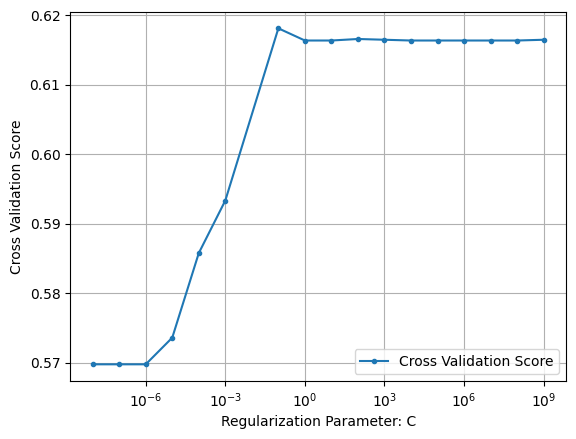

best C value is 0.1


In [8]:
#Replicating results from last notebook
cross_validation_scores = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

#Do some cross validation
for c in C_range:
    LR_model = LogisticRegression(C=c,max_iter=1000, random_state=1)
    
    # the cross validation score (mean of scores from all folds)
    cv_score = np.mean(cross_val_score(LR_model, X_remainder, y_remainder, cv = 5))
    
    cross_validation_scores.append(cv_score)

plt.figure()
plt.plot(C_range, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

index_highest_acc = np.argmax(cross_validation_scores)

print(f'best C value is {C_range[index_highest_acc]}')



In [9]:
LR_model = LogisticRegression(C=0.1,max_iter=1000, random_state=1)
LR_model.fit(X_remainder,y_remainder)

print(LR_model.score(X_test,y_test))

0.6508771929824562


### Let's now try to tweak more hyperparameters

In [ ]:
# Create the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Define the hyperparameter grid for the grid search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
    'multi_class': ['ovr', 'multinomial'],
    'class_weight': [None, 'balanced'],
    'dual': [True, False]
}

# Create the grid search object
grid_search = GridSearchCV(logreg, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_remainder, y_remainder)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


In [11]:
logreg = LogisticRegression(C = 0.1, class_weight = None, dual = False, multi_class = 'ovr', penalty = 'l1', solver = 'saga', max_iter=1000, random_state=1)
logreg.fit(X_remainder,y_remainder)

print(logreg.score(X_test,y_test))

0.6478070175438596


Despite obtaining an accuracy score that is slightly lower with these hyper parameters compared to the model that is only tuned according to a C values, that is okay because this model provides more consistent results across numerous different training sets. In theory it is a more robust model.

Let's now try a similar process with SVM

In [ ]:

# Create the SVM classifier
svm = SVC(max_iter=1000)

# Define the hyperparameter grid for the grid search
param_grid = {
    'C': [0.01,0.1, 1, 10,100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Create the grid search object
grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_remainder, y_remainder)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

- SVM is not even close in this case, so it seems that the log reg model is our most performant.

- Let's now look at some practical applications of this model!

## Practical Application

In [12]:
#Comparing the predicted probabilities to the true outcome

predicted_probabilities = logreg.predict_proba(X_test)
predicted_probabilities_positive = predicted_probabilities[:, 1]
for predicted_probability, true_outcome in zip(predicted_probabilities_positive, y_test):
    print(f"Predicted Probability: {predicted_probability}, True Outcome: {true_outcome}")


Predicted Probability: 0.4901913657308055, True Outcome: 0
Predicted Probability: 0.44271383639649964, True Outcome: 0
Predicted Probability: 0.5096990088780908, True Outcome: 1
Predicted Probability: 0.7206492097179639, True Outcome: 1
Predicted Probability: 0.3492498821033701, True Outcome: 1
Predicted Probability: 0.5598316708200639, True Outcome: 0
Predicted Probability: 0.6093161209235312, True Outcome: 1
Predicted Probability: 0.6853536761103052, True Outcome: 1
Predicted Probability: 0.6210073189959425, True Outcome: 1
Predicted Probability: 0.49693014886318904, True Outcome: 1
Predicted Probability: 0.6610747072796663, True Outcome: 1
Predicted Probability: 0.5370233256349536, True Outcome: 1
Predicted Probability: 0.5524196366390389, True Outcome: 1
Predicted Probability: 0.3780736966151421, True Outcome: 1
Predicted Probability: 0.4611272025853674, True Outcome: 0
Predicted Probability: 0.4858280143815344, True Outcome: 0
Predicted Probability: 0.6920457179994144, True Outcom

In [13]:
# Filter the games based on the desired criteria
custom_train_df = final_df[(final_df['year'] != 2022)]
custom_test_df = final_df[(final_df['year'] == 2022)]

# Create test and train features and targets
X_remainder = custom_train_df.drop(['home_win', 'home_abbr', 'away_abbr', 'year', 'week'], axis=1)
y_remainder = custom_train_df['home_win']

X_test = custom_test_df.drop(['home_win', 'home_abbr', 'away_abbr', 'year', 'week'], axis=1)
y_test = custom_test_df['home_win']

#Instantiate and fit the model
logreg = LogisticRegression(C = 0.1, class_weight = None, dual = False, multi_class = 'ovr', penalty = 'l1', solver = 'saga', max_iter=1000, random_state=1)
logreg.fit(X_remainder,y_remainder)


# Extracts the probabilities
predicted_probabilities = logreg.predict_proba(X_test)
# Extracts the probabilities of the home team winning
predicted_probabilities_positive = predicted_probabilities[:, 1]

# Create an empty DataFrame to store the information
result_df = pd.DataFrame(columns=['week', 'home_abbr', 'away_abbr', 'model_win_prob', 'true_outcome'])

# Iterate over the predictions and append the information to the DataFrame
for i in range(len(custom_test_df)):
    week = custom_test_df.iloc[i]['week']  # Get the 'week' value for the current row
    home_abbr = custom_test_df.iloc[i]['home_abbr']
    away_abbr = custom_test_df.iloc[i]['away_abbr']
    win_prob = round(predicted_probabilities_positive[i], 3)
    true_outcome = y_test.iloc[i]
    result_df = result_df.append({'week': week, 'home_abbr': home_abbr, 'away_abbr': away_abbr, 'model_win_prob': win_prob, 'true_outcome': true_outcome}, ignore_index=True)

print(logreg.score(X_test, y_test))
print(result_df)


print(logreg.score(X_test,y_test))
result_df

0.6264150943396226
    week home_abbr away_abbr  model_win_prob true_outcome
0      2       kan       sdg           0.509            1
1      2       cle       nyj           0.454            0
2      2       det       was           0.480            1
3      2       jax       clt           0.534            1
4      2       nor       tam           0.409            0
..   ...       ...       ...             ...          ...
260   18       gnb       det           0.721            0
261   20       buf       cin           0.661            0
262   20       sfo       dal           0.758            1
263   21       phi       sfo           0.519            1
264   21       kan       cin           0.439            1

[265 rows x 5 columns]
0.6264150943396226


,week,home_abbr,away_abbr,model_win_prob,true_outcome
0,2,kan,sdg,0.509,1
1,2,cle,nyj,0.454,0
2,2,det,was,0.480,1
3,2,jax,clt,0.534,1
4,2,nor,tam,0.409,0
...,...,...,...,...,...
260,18,gnb,det,0.721,0
261,20,buf,cin,0.661,0
262,20,sfo,dal,0.758,1
263,21,phi,sfo,0.519,1


The above code uses all data from seasons before 2022 as a training set and then tests on the 2022 season. It appears the model correctly predicted the winner 62.6% of the time. In order contextualize these results, let's compare them to sportsbook data obtained from https://www.kaggle.com/datasets/tobycrabtree/nfl-scores-and-betting-data?resource=download&select=spreadspoke_scores.csv

In [14]:
betting_data = pd.read_csv('spreadspoke_data.csv')
betting_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13516 entries, 0 to 13515
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        13516 non-null  object 
 1   schedule_season      13516 non-null  int64  
 2   schedule_week        13516 non-null  object 
 3   schedule_playoff     13516 non-null  bool   
 4   team_home            13516 non-null  object 
 5   score_home           13516 non-null  int64  
 6   score_away           13516 non-null  int64  
 7   team_away            13516 non-null  object 
 8   team_favorite_id     11037 non-null  object 
 9   spread_favorite      11037 non-null  float64
 10  over_under_line      11027 non-null  object 
 11  stadium              13516 non-null  object 
 12  stadium_neutral      13516 non-null  bool   
 13  weather_temperature  12309 non-null  float64
 14  weather_wind_mph     12293 non-null  float64
 15  weather_humidity     8468 non-null  

In [15]:
betting_data['schedule_week'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', 'Conference', 'Superbowl', '17',
       'Division', 'Wildcard', '18'], dtype=object)

In [16]:
week_mapping = {
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5,
    '6': 6,
    '7': 7,
    '8': 8,
    '9': 9,
    '10': 10,
    '11': 11,
    '12': 12,
    '13': 13,
    '14': 14,
    '15': 15,
    '16': 16,
    '17': 17,
    '18': 18,
    'Wildcard': 19,
    'Division': 20,
    'Conference': 21,
    'Superbowl': 22,
}

# Use the map() function to replace the string values with integers
betting_data['schedule_week'] = betting_data['schedule_week'].map(week_mapping)

# Filter rows where the 'schedule_season' column has the value 2022 and exclude week 1
betting_data_2022 = betting_data[(betting_data['schedule_season'] == 2022) & (betting_data['schedule_week'] != 1)]

In [17]:
betting_data_2022['schedule_week'].unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22])

In [18]:
betting_data_2022

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
13248,9/15/2022,2022,2,False,Kansas City Chiefs,27,24,Los Angeles Chargers,KC,-4.0,52.5,GEHA Field at Arrowhead Stadium,False,NaN,NaN,NaN,NaN
13249,9/18/2022,2022,2,False,Baltimore Ravens,38,42,Miami Dolphins,BAL,-3.5,44,M&T Bank Stadium,False,NaN,NaN,NaN,NaN
13250,9/18/2022,2022,2,False,Cleveland Browns,30,31,New York Jets,CLE,-6.5,38.5,FirstEnergy Stadium,False,NaN,NaN,NaN,NaN
13251,9/18/2022,2022,2,False,Dallas Cowboys,20,17,Cincinnati Bengals,CIN,-7.0,42,AT&T Stadium,False,72.0,0.0,NaN,indoor
13252,9/18/2022,2022,2,False,Denver Broncos,16,9,Houston Texans,DEN,-10.0,45.5,Empower Field at Mile High,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13511,1/22/2023,2022,20,True,Buffalo Bills,10,27,Cincinnati Bengals,BUF,-6.0,48.5,Highmark Stadium,False,32.0,4.0,100.0,snow
13512,1/22/2023,2022,20,True,San Francisco 49ers,19,12,Dallas Cowboys,SF,-3.5,46.5,Levi's Stadium,False,55.0,19.0,47.0,NaN
13513,1/29/2023,2022,21,True,Kansas City Chiefs,23,20,Cincinnati Bengals,KC,-1.5,48,GEHA Field at Arrowhead Stadium,False,22.0,13.0,55.0,NaN
13514,1/29/2023,2022,21,True,Philadelphia Eagles,31,7,San Francisco 49ers,PHI,-2.5,45.5,Lincoln Financial Field,False,52.0,14.0,48.0,rain


In [19]:
betting_data_2022['team_favorite_id'].unique()

array(['KC', 'BAL', 'CLE', 'CIN', 'DEN', 'DET', 'GB', 'IND', 'LVR', 'LAR',
       'TB', 'CAR', 'NE', 'SF', 'BUF', 'PHI', 'NO', 'CHI', 'LAC', 'MIN',
       'SEA', 'NYG', 'DAL', 'PIT', 'JAX', 'MIA', 'TEN', 'WAS', 'ARI',
       'NYJ', 'ATL'], dtype=object)

In [20]:
(result_df['home_abbr'].unique())

array(['kan', 'cle', 'det', 'jax', 'nor', 'nyg', 'pit', 'rav', 'ram',
       'sfo', 'dal', 'den', 'rai', 'gnb', 'buf', 'phi', 'car', 'chi',
       'clt', 'mia', 'min', 'nwe', 'nyj', 'oti', 'was', 'sdg', 'crd',
       'sea', 'tam', 'cin', 'atl', 'htx'], dtype=object)

In [21]:
# Convert team names to lowercase
betting_data_2022['team_favorite_id'] = betting_data_2022['team_favorite_id'].str.lower()
# Define the replacement mapping for team names
team_name_mapping = {
    'lvr': 'rai',
    'sf': 'sfo',
    'tb': 'tam',
    'ten': 'oti',
    'ari': 'crd',
    'bal': 'rav',
    'gb': 'gnb',
    'hou': 'htx',
    'ind': 'clt',
    'kc': 'kan',
    'lac': 'sdg',
    'lar': 'ram',
    'ne': 'nwe',
    'no': 'nor',
}

# Replace team names in betting_data_2022 DataFrame using the mapping
betting_data_2022['team_favorite_id'] = betting_data_2022['team_favorite_id'].replace(team_name_mapping)


In [22]:
#Checking for any differences
betting_data_unique_teams = set(betting_data_2022['team_favorite_id'].unique())
result_df_unique_teams = set(result_df['home_abbr'].unique())

betting_data_unique_teams.symmetric_difference(result_df_unique_teams)


{'htx'}

After further research it was determined that having htx here is normal because the team was never a favorite in the past season

In [23]:
betting_data_2022['team_home'].unique()

array(['Kansas City Chiefs', 'Baltimore Ravens', 'Cleveland Browns',
       'Dallas Cowboys', 'Denver Broncos', 'Detroit Lions',
       'Green Bay Packers', 'Jacksonville Jaguars', 'Las Vegas Raiders',
       'Los Angeles Rams', 'New Orleans Saints', 'New York Giants',
       'Pittsburgh Steelers', 'San Francisco 49ers', 'Buffalo Bills',
       'Philadelphia Eagles', 'Arizona Cardinals', 'Carolina Panthers',
       'Chicago Bears', 'Indianapolis Colts', 'Los Angeles Chargers',
       'Miami Dolphins', 'Minnesota Vikings', 'New England Patriots',
       'New York Jets', 'Seattle Seahawks', 'Tampa Bay Buccaneers',
       'Tennessee Titans', 'Washington Commanders', 'Cincinnati Bengals',
       'Atlanta Falcons', 'Houston Texans'], dtype=object)

In [24]:
# Define the mapping dictionary for team names to abbreviations
team_name_to_abbr_mapping = {
    'Kansas City Chiefs': 'kan',
    'Baltimore Ravens': 'rav',
    'Cleveland Browns': 'cle',
    'Dallas Cowboys': 'dal',
    'Denver Broncos': 'den',
    'Detroit Lions': 'det',
    'Green Bay Packers': 'gnb',
    'Jacksonville Jaguars': 'jax',
    'Las Vegas Raiders': 'rai',
    'Los Angeles Rams': 'ram',
    'New Orleans Saints': 'nor',
    'New York Giants': 'nyg',
    'Pittsburgh Steelers': 'pit',
    'San Francisco 49ers': 'sfo',
    'Buffalo Bills': 'buf',
    'Philadelphia Eagles': 'phi',
    'Arizona Cardinals': 'crd',
    'Carolina Panthers': 'car',
    'Chicago Bears': 'chi',
    'Indianapolis Colts': 'clt',
    'Los Angeles Chargers': 'sdg',
    'Miami Dolphins': 'mia',
    'Minnesota Vikings': 'min',
    'New England Patriots': 'nwe',
    'New York Jets': 'nyj',
    'Seattle Seahawks': 'sea',
    'Tampa Bay Buccaneers': 'tam',
    'Tennessee Titans': 'oti',
    'Washington Commanders': 'was',
    'Cincinnati Bengals': 'cin',
    'Atlanta Falcons': 'atl',
    'Houston Texans': 'htx',
}

# Map the team names to abbreviations in your DataFrame
betting_data_2022['team_home'] = betting_data_2022['team_home'].map(team_name_to_abbr_mapping)
betting_data_2022['team_away'] = betting_data_2022['team_away'].map(team_name_to_abbr_mapping)

betting_data_2022

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
13248,9/15/2022,2022,2,False,kan,27,24,sdg,kan,-4.0,52.5,GEHA Field at Arrowhead Stadium,False,NaN,NaN,NaN,NaN
13249,9/18/2022,2022,2,False,rav,38,42,mia,rav,-3.5,44,M&T Bank Stadium,False,NaN,NaN,NaN,NaN
13250,9/18/2022,2022,2,False,cle,30,31,nyj,cle,-6.5,38.5,FirstEnergy Stadium,False,NaN,NaN,NaN,NaN
13251,9/18/2022,2022,2,False,dal,20,17,cin,cin,-7.0,42,AT&T Stadium,False,72.0,0.0,NaN,indoor
13252,9/18/2022,2022,2,False,den,16,9,htx,den,-10.0,45.5,Empower Field at Mile High,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13511,1/22/2023,2022,20,True,buf,10,27,cin,buf,-6.0,48.5,Highmark Stadium,False,32.0,4.0,100.0,snow
13512,1/22/2023,2022,20,True,sfo,19,12,dal,sfo,-3.5,46.5,Levi's Stadium,False,55.0,19.0,47.0,NaN
13513,1/29/2023,2022,21,True,kan,23,20,cin,kan,-1.5,48,GEHA Field at Arrowhead Stadium,False,22.0,13.0,55.0,NaN
13514,1/29/2023,2022,21,True,phi,31,7,sfo,phi,-2.5,45.5,Lincoln Financial Field,False,52.0,14.0,48.0,rain


In [25]:
#Retaining the relevant columns
betting_data_2022 = betting_data_2022[['schedule_week', 'team_home', 'team_away', 'team_favorite_id', 'spread_favorite']]
betting_data_2022

,schedule_week,team_home,team_away,team_favorite_id,spread_favorite
13248,2,kan,sdg,kan,-4.0
13249,2,rav,mia,rav,-3.5
13250,2,cle,nyj,cle,-6.5
13251,2,dal,cin,cin,-7.0
13252,2,den,htx,den,-10.0
...,...,...,...,...,...
13511,20,buf,cin,buf,-6.0
13512,20,sfo,dal,sfo,-3.5
13513,21,kan,cin,kan,-1.5
13514,21,phi,sfo,phi,-2.5


In [26]:
betting_data_2022['spread_favorite'].unique()

array([ -4. ,  -3.5,  -6.5,  -7. , -10. ,  -1. ,  -3. ,  -5.5,  -2.5,
        -8.5,  -4.5,  -2. ,  -1.5,  -5. ,  -6. ,  -9.5, -14. ,  -9. ,
       -10.5,  -7.5, -13. , -11.5,  -8. , -11. , -12.5, -15.5, -17. ,
       -14.5])

In [27]:

# Define the mapping dictionary for spread values to win probabilities (obtained from https://www.boydsbets.com/nfl-spread-to-moneyline-conversion/)

spread_to_prob_mapping = {
    -4.0: 65.80, -3.5: 64.30, -6.5: 72.40, -7.0: 75.20, -10.0: 83.60,
    -1.0: 51.30, -3.0: 59.40, -5.5: 69.00, -2.5: 54.50, -8.5: 80.20,
    -4.5: 67.30, -2.0: 53.50, -1.5: 52.50, -5.0: 68.10, -6.0: 70.70,
    -9.5: 81.10, -14.0: 92.40, -9.0: 80.70, -10.5: 86.00, -7.5: 78.10,
    -13.0: 89.30, -11.5: 88.20, -8.0: 79.10, -11.0: 87.10, -12.5: 88.70,
    -15.5: 96.30, -17.0: 100.00
}

# Create the new column 'win_prob' by mapping the 'spread_favorite' column to probabilities
betting_data_2022['book_win_prob'] = betting_data_2022['spread_favorite'].map(spread_to_prob_mapping)

betting_data_2022

,schedule_week,team_home,team_away,team_favorite_id,spread_favorite,book_win_prob
13248,2,kan,sdg,kan,-4.0,65.8
13249,2,rav,mia,rav,-3.5,64.3
13250,2,cle,nyj,cle,-6.5,72.4
13251,2,dal,cin,cin,-7.0,75.2
13252,2,den,htx,den,-10.0,83.6
...,...,...,...,...,...,...
13511,20,buf,cin,buf,-6.0,70.7
13512,20,sfo,dal,sfo,-3.5,64.3
13513,21,kan,cin,kan,-1.5,52.5
13514,21,phi,sfo,phi,-2.5,54.5


In [28]:
#Convert win probabilities to reflect the home probability
betting_data_2022['book_win_prob'] = betting_data_2022.apply(lambda row: row['book_win_prob'] if row['team_favorite_id'] == row['team_home'] else 100 - row['book_win_prob'], axis=1)
betting_data_2022

,schedule_week,team_home,team_away,team_favorite_id,spread_favorite,book_win_prob
13248,2,kan,sdg,kan,-4.0,65.8
13249,2,rav,mia,rav,-3.5,64.3
13250,2,cle,nyj,cle,-6.5,72.4
13251,2,dal,cin,cin,-7.0,24.8
13252,2,den,htx,den,-10.0,83.6
...,...,...,...,...,...,...
13511,20,buf,cin,buf,-6.0,70.7
13512,20,sfo,dal,sfo,-3.5,64.3
13513,21,kan,cin,kan,-1.5,52.5
13514,21,phi,sfo,phi,-2.5,54.5


In [29]:
#Renaming columns
betting_data_2022.rename(columns={'schedule_week': 'week', 'team_home': 'home_abbr', 'team_away': 'away_abbr'}, inplace=True)
betting_data_2022

,week,home_abbr,away_abbr,team_favorite_id,spread_favorite,book_win_prob
13248,2,kan,sdg,kan,-4.0,65.8
13249,2,rav,mia,rav,-3.5,64.3
13250,2,cle,nyj,cle,-6.5,72.4
13251,2,dal,cin,cin,-7.0,24.8
13252,2,den,htx,den,-10.0,83.6
...,...,...,...,...,...,...
13511,20,buf,cin,buf,-6.0,70.7
13512,20,sfo,dal,sfo,-3.5,64.3
13513,21,kan,cin,kan,-1.5,52.5
13514,21,phi,sfo,phi,-2.5,54.5


In [107]:
#merging the dfs to include model and book probabilities
merged_df = result_df.merge(betting_data_2022[['week', 'home_abbr', 'away_abbr', 'book_win_prob']], on=['week', 'home_abbr', 'away_abbr'], how='left')
merged_df

,week,home_abbr,away_abbr,model_win_prob,true_outcome,book_win_prob
0,2,kan,sdg,0.509,1,65.8
1,2,cle,nyj,0.454,0,72.4
2,2,det,was,0.480,1,51.3
3,2,jax,clt,0.534,1,40.6
4,2,nor,tam,0.409,0,45.5
...,...,...,...,...,...,...
260,18,gnb,det,0.721,0,65.8
261,20,buf,cin,0.661,0,70.7
262,20,sfo,dal,0.758,1,64.3
263,21,phi,sfo,0.519,1,54.5


In [108]:
#Convert probabilities to the same scale
merged_df['model_win_prob'] = merged_df['model_win_prob'] *100

# Calculate the accuracy of the 'model_win_prob'

model_accuracy = np.mean((merged_df['model_win_prob'] >= 50) == merged_df['true_outcome'])

# Calculate the accuracy of the 'book_win_prob'
book_accuracy = np.mean((merged_df['book_win_prob'] >= 50.0) == merged_df['true_outcome'])

# Print the accuracies
print("Model Accuracy:", model_accuracy)
print("Book Win Probability Accuracy:", book_accuracy)
print(f'The book win probability was {100*(book_accuracy-model_accuracy)}% more accurate')
merged_df

Model Accuracy: 0.6264150943396226
Book Win Probability Accuracy: 0.6641509433962264
The book win probability was 3.7735849056603765% more accurate


,week,home_abbr,away_abbr,model_win_prob,true_outcome,book_win_prob
0,2,kan,sdg,50.9,1,65.8
1,2,cle,nyj,45.4,0,72.4
2,2,det,was,48.0,1,51.3
3,2,jax,clt,53.4,1,40.6
4,2,nor,tam,40.9,0,45.5
...,...,...,...,...,...,...
260,18,gnb,det,72.1,0,65.8
261,20,buf,cin,66.1,0,70.7
262,20,sfo,dal,75.8,1,64.3
263,21,phi,sfo,51.9,1,54.5


In [109]:
print(f"The mean accuracy difference between the model and book probabilities is {np.mean(abs(merged_df['model_win_prob']-merged_df['book_win_prob']))}%")
           

The mean accuracy difference between the model and book probabilities is 11.091634980988594%


- As seen above the book probabilities is still overall better at predicting winners, but by less than 4%! 
- Let's see how much money we would have won/lost using this model


In [110]:
#Creating a df where the model would have accurately predicted the winner
wins = merged_df[((merged_df['model_win_prob'] > 50) &(merged_df['true_outcome'] == 1)) | ((merged_df['model_win_prob'] < 50) &(merged_df['true_outcome'] == 0))]
wins.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 263
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   week            166 non-null    object 
 1   home_abbr       166 non-null    object 
 2   away_abbr       166 non-null    object 
 3   model_win_prob  166 non-null    float64
 4   true_outcome    166 non-null    object 
 5   book_win_prob   164 non-null    float64
dtypes: float64(2), object(4)
memory usage: 9.1+ KB


In [111]:
#Shows nan rows
wins[pd.isna(wins).any(axis=1)]

,week,home_abbr,away_abbr,model_win_prob,true_outcome,book_win_prob
201,15,htx,kan,30.7,0,NaN
258,18,sfo,crd,77.6,1,NaN


In [112]:
# Fill NaN values in 'book_win_prob' with corresponding values from 'model_win_prob'
wins['book_win_prob'].fillna(wins['model_win_prob'], inplace=True)

In [113]:
wins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 263
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   week            166 non-null    object 
 1   home_abbr       166 non-null    object 
 2   away_abbr       166 non-null    object 
 3   model_win_prob  166 non-null    float64
 4   true_outcome    166 non-null    object 
 5   book_win_prob   166 non-null    float64
dtypes: float64(2), object(4)
memory usage: 9.1+ KB


In [114]:
#Creating a df where the model would  not have accurately predicted the winner

losses = merged_df[((merged_df['model_win_prob'] > 50) &(merged_df['true_outcome'] == 0)) | ((merged_df['model_win_prob'] < 50) &(merged_df['true_outcome'] == 1))]
losses.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 2 to 264
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   week            99 non-null     object 
 1   home_abbr       99 non-null     object 
 2   away_abbr       99 non-null     object 
 3   model_win_prob  99 non-null     float64
 4   true_outcome    99 non-null     object 
 5   book_win_prob   99 non-null     float64
dtypes: float64(2), object(4)
memory usage: 5.4+ KB


Essentially what this data is telling us is that over the course of the season, we would have predicted the correct winner 166 times and predicted the wrong winner 99 times. Let's now check if we would have been profitable!


Before getting into more details, it is important to understand vig.

Vig, short for vigorish, is the fee charged by bookmakers for accepting bets in sports betting. It is built into the odds they offer and ensures the bookmaker makes a profit regardless of the outcome. 

Here is a basic example with a coin flip:
- Bookmaker's Odds: The bookmaker offers odds of 1.9 for heads and 1.9 for tails in a coin toss game.

- Implied Probabilities: To calculate the implied probabilities, we use the formula: Probability (P) = 1 / Odds (O). In this case, P = 1 / 1.9 ≈ 0.5263.

- Vig: The bookmaker sets odds slightly below fair probability to create a margin. The sum of the implied probabilities is approximately 0.5263 + 0.5263 ≈ 1.0526, which is greater than 1 (100%).

In this example, the bookmaker's odds imply a probability of around 52.63% for each outcome (heads or tails). However, the actual probability of a fair coin toss is 50% for each outcome. The difference (2.63%) accounts for the bookmaker's profit (vig) on the bets they take.

In [115]:

# Creating a function to calculate 'book_implied_win_prob'
def calculate_implied_win_prob(row):
    if row['model_win_prob'] > 50:
        return row['book_win_prob'] + 2.63
    elif row['model_win_prob'] < 50:
        return 100 - row['book_win_prob'] + 2.63
    else:
        return None  # Handle the case when model_win_prob is exactly 50

# Apply the custom function to create a new column
wins['book_implied_win_prob'] = wins.apply(calculate_implied_win_prob, axis=1)
wins


,week,home_abbr,away_abbr,model_win_prob,true_outcome,book_win_prob,book_implied_win_prob
0,2,kan,sdg,50.9,1,65.8,68.43
1,2,cle,nyj,45.4,0,72.4,30.23
3,2,jax,clt,53.4,1,40.6,43.23
4,2,nor,tam,40.9,0,45.5,57.13
5,2,nyg,car,54.3,1,48.7,51.33
...,...,...,...,...,...,...,...
256,20,phi,nyg,75.6,1,79.1,81.73
257,18,sea,ram,67.8,1,67.3,69.93
258,18,sfo,crd,77.6,1,77.6,80.23
262,20,sfo,dal,75.8,1,64.3,66.93


In [117]:
#Creates a column for  decimal odds
wins['book_decimal_odds'] = round(1/(wins['book_implied_win_prob']/100),2)
wins

,week,home_abbr,away_abbr,model_win_prob,true_outcome,book_win_prob,book_implied_win_prob,book_decimal_odds
0,2,kan,sdg,50.9,1,65.8,68.43,1.46
1,2,cle,nyj,45.4,0,72.4,30.23,3.31
3,2,jax,clt,53.4,1,40.6,43.23,2.31
4,2,nor,tam,40.9,0,45.5,57.13,1.75
5,2,nyg,car,54.3,1,48.7,51.33,1.95
...,...,...,...,...,...,...,...,...
256,20,phi,nyg,75.6,1,79.1,81.73,1.22
257,18,sea,ram,67.8,1,67.3,69.93,1.43
258,18,sfo,crd,77.6,1,77.6,80.23,1.25
262,20,sfo,dal,75.8,1,64.3,66.93,1.49


In [118]:
print('Betting on every game of the season would result in a loss of',round((losses.shape[0])-(wins['book_decimal_odds'].sum()-wins['book_decimal_odds'].count()),2))


Betting on every game of the season would result in a loss of 8.65


The above code makes the assumption that I will bet 1 dollar on every game based on model predictions and sportsbook odds. The right part of the equation takes the winnings and substracts the initial investment to determine profit from wins. Then the profits are substracted from the lost bets to yield an overall loss of 8.65$

Although this was not profitable, running a loss of 8.65 units over the span of 265 bets is much better than the average gambler.


Let's now try to see if there is a particular case where our model could be profitable. We will start with cases where our model contradicts the sportsbook. (These are the instances where we would be betting on the underdog, providing larger profit margins)

In [76]:
# Condition 1: model prob > 50, book prob < 50, true outcome == 1
condition1 = (merged_df['model_win_prob'] > 50) & (merged_df['book_win_prob'] < 50) & (merged_df['true_outcome'] == 1)

# Condition 2: model prob < 50, book prob > 50, true outcome == 0
condition2 = (merged_df['model_win_prob'] < 50) & (merged_df['book_win_prob'] > 50) & (merged_df['true_outcome'] == 0)

# Combine conditions using logical OR (|)
underdog_wins = merged_df[condition1 | condition2]
underdog_wins.shape

(26, 6)

In [77]:
# Condition 3: model prob > 50, book prob < 50, true outcome == 0
condition3 = (merged_df['model_win_prob'] > 50) & (merged_df['book_win_prob'] < 50) & (merged_df['true_outcome'] == 0)

# Condition 4: model prob < 50, book prob > 50, true outcome == 1
condition4 = (merged_df['model_win_prob'] < 50) & (merged_df['book_win_prob'] > 50) & (merged_df['true_outcome'] == 1)

# Combine conditions using logical OR (|)
underdog_losses = merged_df[condition3 | condition4]
underdog_losses.shape

(37, 6)

Essentially what this data is telling us is that over the course of the season, we would have predicted a different winner than the sportsbook (37+26 = 63) times. We would have lost 37 and won 26. However because we are betting on underdogs, our payout is always greater than 2/1 meaning that it is stil possible to be profitable. Let's now check if in fact we would have been profitable!

In [78]:
underdog_wins

,week,home_abbr,away_abbr,model_win_prob,true_outcome,book_win_prob
1,2,cle,nyj,45.4,0,72.4
3,2,jax,clt,53.4,1,40.6
5,2,nyg,car,54.3,1,48.7
7,2,rav,mia,48.9,0,64.3
21,3,mia,buf,52.9,1,34.2
25,3,oti,rai,72.0,1,46.5
27,3,sdg,jax,45.9,0,72.4
31,3,den,sfo,56.4,1,47.5
35,4,atl,cle,61.4,1,48.7
57,5,nyj,mia,56.2,1,40.6


In [79]:
underdog_losses

,week,home_abbr,away_abbr,model_win_prob,true_outcome,book_win_prob
2,2,det,was,48.0,1,51.3
6,2,pit,nwe,63.5,0,40.6
23,3,nwe,rav,55.9,0,45.5
24,3,nyj,cin,59.8,0,27.6
33,4,cin,mia,42.4,1,65.8
43,4,rav,buf,56.4,0,40.6
45,4,gnb,nwe,46.9,1,81.1
52,5,cle,sdg,61.3,0,47.5
55,5,nor,sea,47.4,1,69.0
58,5,tam,atl,49.5,1,86.0


In [80]:
#Creates a column for the book win probabilities for underdogs including the vig 
underdog_wins['underdog_book_implied_win_prob'] =  underdog_wins.apply(lambda row: row['book_win_prob'] + 2.63 if row['book_win_prob'] < 50 else 100 - row['book_win_prob'] + 2.63, axis=1)
underdog_wins


,week,home_abbr,away_abbr,model_win_prob,true_outcome,book_win_prob,underdog_book_implied_win_prob
1,2,cle,nyj,45.4,0,72.4,30.23
3,2,jax,clt,53.4,1,40.6,43.23
5,2,nyg,car,54.3,1,48.7,51.33
7,2,rav,mia,48.9,0,64.3,38.33
21,3,mia,buf,52.9,1,34.2,36.83
25,3,oti,rai,72.0,1,46.5,49.13
27,3,sdg,jax,45.9,0,72.4,30.23
31,3,den,sfo,56.4,1,47.5,50.13
35,4,atl,cle,61.4,1,48.7,51.33
57,5,nyj,mia,56.2,1,40.6,43.23


In [81]:
#Creates a column for underdog decimal odds
underdog_wins['underdog_book_decimal_odds'] = round(1/(underdog_wins['underdog_book_implied_win_prob']/100),2)
underdog_wins

,week,home_abbr,away_abbr,model_win_prob,true_outcome,book_win_prob,underdog_book_implied_win_prob,underdog_book_decimal_odds
1,2,cle,nyj,45.4,0,72.4,30.23,3.31
3,2,jax,clt,53.4,1,40.6,43.23,2.31
5,2,nyg,car,54.3,1,48.7,51.33,1.95
7,2,rav,mia,48.9,0,64.3,38.33,2.61
21,3,mia,buf,52.9,1,34.2,36.83,2.72
25,3,oti,rai,72.0,1,46.5,49.13,2.04
27,3,sdg,jax,45.9,0,72.4,30.23,3.31
31,3,den,sfo,56.4,1,47.5,50.13,1.99
35,4,atl,cle,61.4,1,48.7,51.33,1.95
57,5,nyj,mia,56.2,1,40.6,43.23,2.31


In [94]:
print('Betting on book underdogs that our model predicts should be favorites would result in a loss of',round((underdog_losses.shape[0])-(underdog_wins['underdog_book_decimal_odds'].sum()-underdog_wins['underdog_book_decimal_odds'].count()),2))


Betting on book underdogs that our model predicts should be favorites would result in a loss of 2.71


The above code makes the assumption that I will bet 1 dollar on every game where the model predicts a different winner than the sportsbook (essentially betting on underdogs). The right part of the equation takes the winnings and substracts the initial investment to determine profit from wins. The the profits are substracted from the lost bets to yield an overall loss of 2.71$

Although this was not profitable, running a loss of 2.71 units over the span of 63 bets is much better than the average gambler. In addition, these bets are all on underdogs which can be much more interesting to root for and overall create a fun watching environment.


## Final Remarks

There are an infinite number of factors to consider when predicting the winner of an NFL game, rest time between games, strength of home field advantage and weather conditions, to name a few. Future models could include these factors and test for improved accuracies. In addition, different sports books have different odds and vigs, which could also affect the profits or losses of the model. Hunting for the best odds across sports books could yield profitable results. Also, these results were simply the model's performance in 2022, that does not mean that it is certainly a losing model every year or even overall. For that we would require further testing!